# **FMML Module 1, LAB 1**

# **EXTRACTING FEATURES FROM DATA**


**!pip -q install wikipedia nltk matplotlib plotly pandas**
* installs the required Python libraries that might not be pre-installed in the environment.
** **wikipedia:** For accessing Wikipedia articles and using them as a source of textual data.
** **nltk:** The Natural Language Toolkit, useful for text processing tasks such as tokenization, stemming, and more.
** **matplotlib:** A plotting library used for visualizing data, especially in charts and graphs.
** **plotly:** A graphing library that enables interactive visualizations.
** **pandas:** bold text A data manipulation library, particularly useful for handling structured data in DataFrames.

* **Feature Extraction Relevance**: These libraries are essential for gathering data (Wikipedia), processing text (NLTK), manipulating data (pandas), and visualizing features (matplotlib, plotly).
---------------------------------------------------------------------------------------

import re
* **Regular expressions (re)** are used for searching, matching, and manipulating text, which is crucial in feature extraction, especially when cleaning and preprocessing text data.

* **Feature Extraction Relevance:** Useful for tasks such as removing unwanted characters, extracting specific patterns from text, or splitting text based on delimiters.
------------------------------------------------------------------------------------------

import ntlk
* **NLTK** is a powerful library for working with human language data (text). It provides tools for text processing, such as tokenization, lemmatization, and parsing.
* **Feature Extraction Relevance:** NLTK is essential for converting raw text into a structured form (tokens, n-grams, etc.), which can be used as features in machine learning models.
----------------------------------------------------------------------------------------------

import wikipedia
* This library allows you to retrieve content from Wikipedia pages. It can be used to gather large text corpora for text analysis.
* **Feature Extraction Relevance:** Provides a rich source of textual data for extracting features related to specific topics.
--------------------------------------------------------------------------------------------

import numpy
* NumPy is a foundational library for numerical operations in Python. It provides support for large multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
* **Feature Extraction Relevance:** Essential for handling numerical data, performing vectorized operations, and converting features into numerical form.
----------------------------------------------------------------------------------------------------

import unicodedata
* This module provides access to the Unicode Character Database, which defines the properties of Unicode characters.
* **Feature Extraction Relevance:** Used to normalize text (e.g., converting accented characters to their non-accented counterparts), ensuring consistency in feature extraction.
--------------------------------------------------------------------------------------------

import pandas
* Pandas is crucial for data manipulation and analysis, particularly with tabular data stored in DataFrames.
* **Feature Extraction Relevance:** Used to store and manipulate extracted features, allowing for easy integration with machine learning pipelines.
---------------------------------------------------------------------------------------------

import plotly.express

* Plotly Express is a high-level interface for creating interactive plots easily.
* **Feature Extraction Relevance:** Helps visualize the distribution and relationships between different features, aiding in understanding and refining feature extraction.
---------------------------------------------------------------------------------------------

from nltk.util import ngrams
* ngrams are continuous sequences of n items from a given text. For example, bi-grams (2-grams) from the phrase "feature extraction" would be ["feature extraction"].
* **Feature Extraction Relevance:** N-grams are commonly used as features in text analysis, capturing word sequences or patterns that can be indicative of meaning.
----------------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt
* pyplot is a state-based interface for Matplotlib, providing MATLAB-like plotting functionality.
* **Feature Extraction Relevance:** Used for visualizing features, especially when comparing the performance of different features or models.
---------------------------------------------------------------------------------------------------

from collections import Counter
* Counter is a subclass of dictionary used to count hashable objects. It's commonly used to tally word frequencies or other feature counts.
* **Feature Extraction Relevance:** Useful for generating frequency distributions of features, which can be crucial in text analysis for identifying the most common terms, n-grams, etc.
--------------------------------------------------------------------------------------------------

In [1]:
!pip -q install wikipedia nltk matplotlib plotly pandas

import re
import nltk
import wikipedia
import numpy as np
import unicodedata
import pandas as pd
import plotly.express as px
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

# Part 1: Features of text

Computures can't understand text. They can only process numbers. So, the logical first step in any attempt to analyze text is to convert it into numbers. This process is called **feature extraction** or **vectorization**. In this lab, we will try some simple methods for feature extraction.

First, let us download a 2 documents from Wikipedia in two different languages, English and French. We will then extract features from the text in these documents.

In [2]:
topic1 = "Giraffe"
topic2 = "Elephant"

wikipedia.set_lang("en")

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang("fr")

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like in English:

In [3]:
eng1[:500]

'The giraffe is a large African hoofed mammal belonging to the genus Giraffa. It is the tallest living terrestrial animal and the largest ruminant on Earth. Traditionally, giraffes have been thought of as one species, Giraffa camelopardalis, with nine subspecies. Most recently, researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear DNA, and individual species can be distinguished by their fur coat patterns. Seven other extinct species '

This is what the text looks like in French:

In [4]:
fr1[:500]

"La Girafe (Giraffa camelopardalis) est une espèce de mammifères ongulés artiodactyles, du groupe des ruminants, vivant dans les savanes africaines et répandue du Tchad jusqu'en Afrique du Sud. Son nom commun vient de l'arabe زرافة, zarāfah, mais l'animal fut anciennement appelé camélopard, du latin camelopardus, contraction de camelus (chameau) en raison du long cou et de pardus (léopard) en raison des taches recouvrant son corps. Après des millions d'années d'évolution, la girafe a acquis une a"

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [5]:
def cleanup(text):
    text = text.lower()  # make it lowercase
    text = re.sub(
        r"[^a-z\s]", "", text
    )  # only keep characters in a-z range and whitespaces
    return text

In [6]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [7]:
eng1[:500]

'the giraffe is a large african hoofed mammal belonging to the genus giraffa it is the tallest living terrestrial animal and the largest ruminant on earth traditionally giraffes have been thought of as one species giraffa camelopardalis with nine subspecies most recently researchers proposed dividing them into four extant species due to new research into their mitochondrial and nuclear dna and individual species can be distinguished by their fur coat patterns seven other extinct species of giraff'

In [8]:
fr1[:500]

'la girafe giraffa camelopardalis est une espce de mammifres onguls artiodactyles du groupe des ruminants vivant dans les savanes africaines et rpandue du tchad jusquen afrique du sud son nom commun vient de larabe  zarfah mais lanimal fut anciennement appel camlopard du latin camelopardus contraction de camelus chameau en raison du long cou et de pardus lopard en raison des taches recouvrant son corps aprs des millions dannes dvolution la girafe a acquis une anatomie unique avec un cou particuli'

In [9]:
eng2[:500]

'elephants are the largest living land animals three living species are currently recognised the african bush elephant loxodonta africana the african forest elephant l cyclotis and the asian elephant elephas maximus they are the only surviving members of the family elephantidae and the order proboscidea extinct relatives include mammoths and mastodons distinctive features of elephants include a long proboscis called a trunk tusks large ear flaps pillarlike legs and tough but sensitive grey skin t'

In [10]:
fr2[:500]

'les lphants sont des mammifres proboscidiens de la famille des lphantids ils correspondent aujourdhui  trois espces rparties en deux genres distincts llphant de savane dafrique et llphant de fort dafrique autrefois regroups sous la mme espce d lphant dafrique  appartiennent au genre loxodonta tandis que llphant dasie anciennement appel  lphant indien  appartient au genre elephas ils se diffrencient par certaines caractristiques anatomiques les lphants dasie tant en gnral plus petits avec des ore'

* Now let us calculate the frequency of the character n-grams.
* N-grams are groups of characters of size n. (N-grams is a word)
* A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [11]:
def tuple2string(tup):
    # convert a tuple of characters to a string
    # ('t', 'h') - > 'th'
    st = "" #empty string to append characters
    for i in tup:
        st = st + i
    return st


def key2string(keys):
    # convert a tuple of tuples to a list of strings
    # [('t', 'h'), ('h', 'e')] -> ['th', 'he']
    # [('t')] - >['t']
    return [tuple2string(i) for i in keys]


def get_ngram_freq(ngram): #here n gram is the word(or group of characters)
    # get the frequency of ngrams, the repeatition of each character in the text
    # sort the keys in alphabetic order
    keys = key2string(ngram.keys()) # characters present in text
    values = list(ngram.values())   # list each character

    combined = zip(keys, values)    # combine key, values
    zipped_sorted = sorted(combined, key=lambda x: x[0]) # sort characters
    keys, values = map(list, zip(*zipped_sorted))
    return keys, values

Let us compare the histograms of English pages and French pages. Can you spot a difference?

**UNIGRAMS** are basic features in text analysis, and counting them helps in understanding the distribution of words in the text.
For example, The quick brown fox jumps over the lazy dog.

Unigrams - (The, quick, brown, ....., lazy, dog)

#### **Uses of Unigrams:**
* **Text Analysis:** Unigrams are often used in natural language processing (NLP) for basic text analysis, such as word frequency analysis, where you count how often each word appears in a text.
* **Feature Extraction:** In machine learning, unigrams can be used as features in models that process text, helping the model understand the presence and importance of individual words.
* **Sentiment Analysis:** Unigrams can be used to identify words that contribute to the overall sentiment of a text, such as positive or negative words.

**ENGLISH**

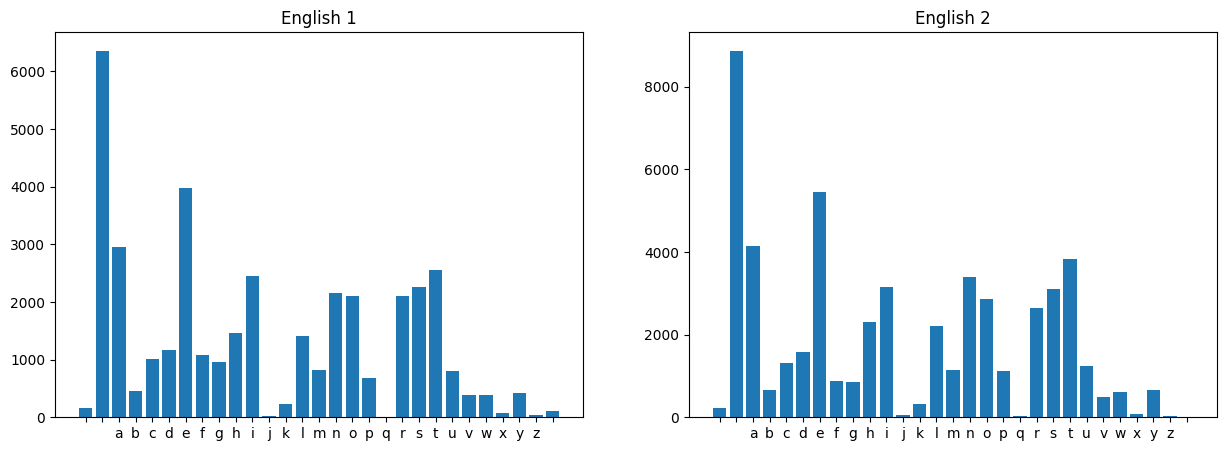

In [12]:
# creates a figure(fig) and set of subplots(axs) for visualizind data
# creates a grid of 1 row and 2 cols of subplots (axs) displayed side-by-side
# figsize() - size of the entire image in inches
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# generates unigrams of eng1 text and counts the frequency
# Counter() - counts frequency of each unigram in text
unigram_eng1 = Counter(ngrams(eng1, 1))

# keys - represent the unigrams
# values - corresponding frequency values from unigram_eng1 Counter
keys, values = get_ngram_freq(unigram_eng1)

# for the first subplot
# creates a bar chart where the bar represents - key , its height - frequency
axs[0].bar(keys, values)
# a title is set for the bar graph
axs[0].set_title("English 1")

# similarly for the second subplot
unigram_eng2 = Counter(ngrams(eng2, 1))
keys, values = get_ngram_freq(unigram_eng2)
axs[1].bar(keys, values)
axs[1].set_title("English 2")

# renders the figure on the screen, showing the graphs/charts
plt.show()

**FRENCH**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


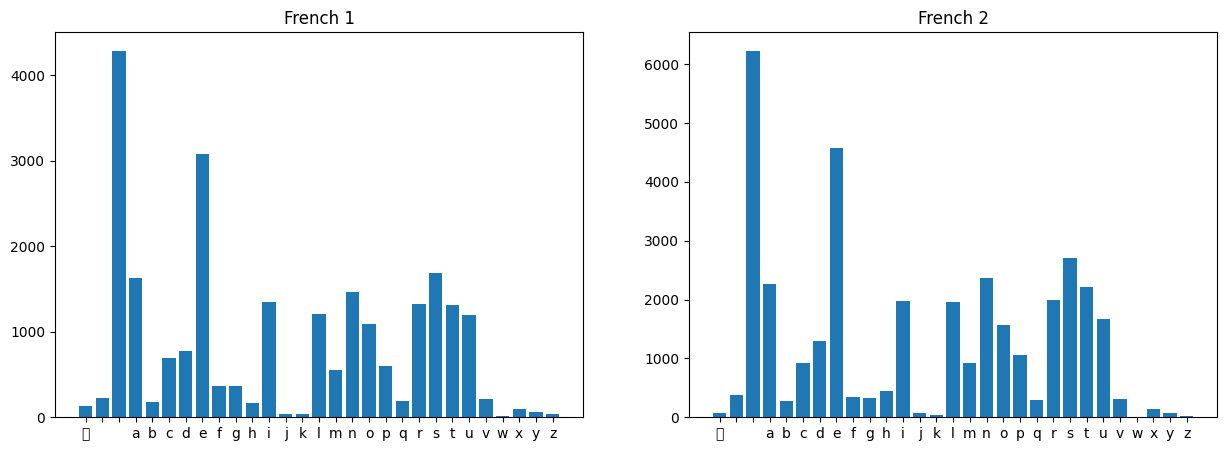

In [13]:
# subplots are created stored in fig
# grid of 1 row and 2 cols of subplots created side-by-side
# figure size mentioned in figsize() in inches
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# generates unigrams of length 1
# Counter counts the frequency of unigrams
unigram_fr1 = Counter(ngrams(fr1, 1))

# keys- represent the unigrams
# values - represent the frequency of unigrams
keys, values = get_ngram_freq(unigram_fr1)

# for the first subplot, keys v/s values are plotted
axs[0].bar(keys, values)
axs[0].set_title("French 1")

# similar for the second subplot
unigram_fr2 = Counter(ngrams(fr2, 1))
keys, values = get_ngram_freq(unigram_fr2)
axs[1].bar(keys, values)
axs[1].set_title("French 2")

#renders the figure on the screen showing graphs/charts
plt.show()

* We can see that the unigrams for French and English are very similar.
* So this is not a good feature if we want to distinguish between English and French.
* Let us look at bigrams.

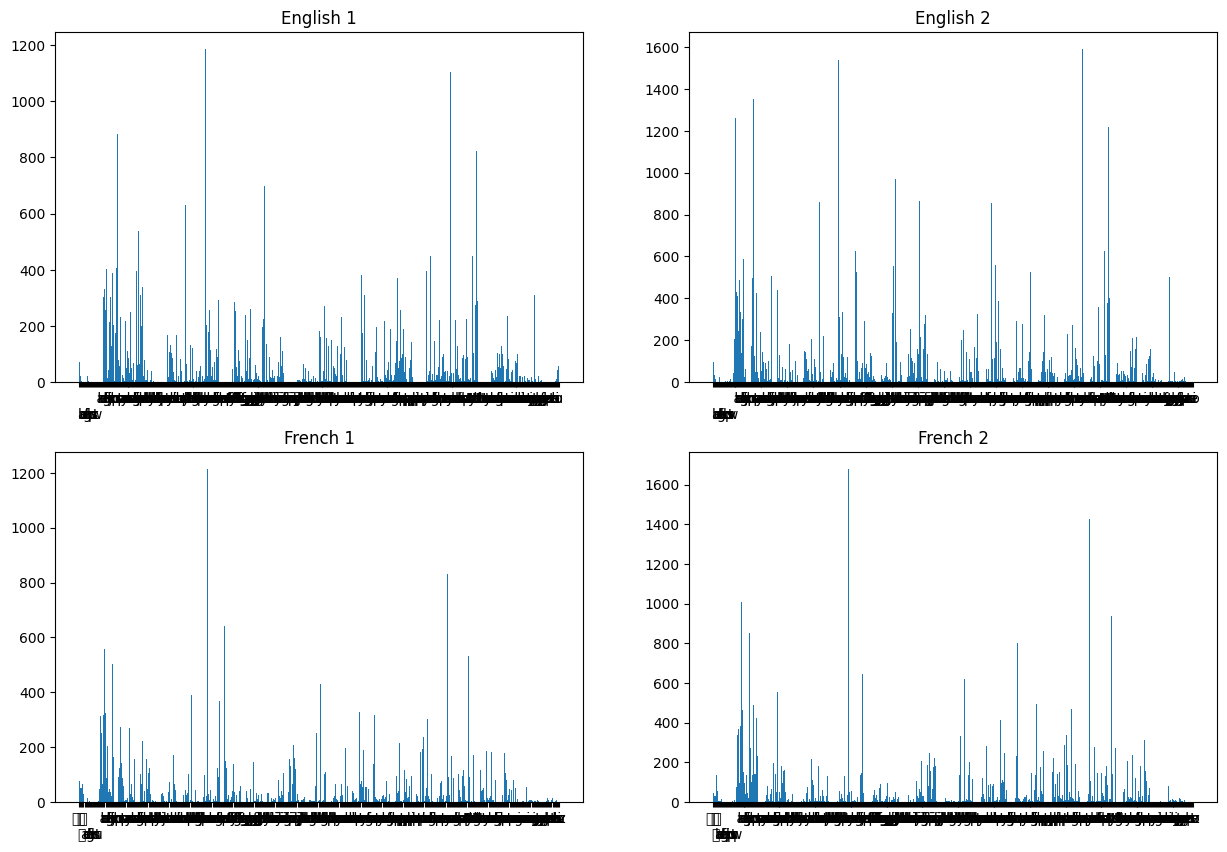

In [14]:
# For the first English text, we find bigrams
# four subplots created and stores in fig
# a grid of 2 rows, 2 cols created
# the graph figure size is set by figsize
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# n-gram of size two is called bigram
# ngrams(eng1,2) - gives ngrams of length 2
# Counter() counts the frequency of bigrams
bigram_eng1 = Counter(ngrams(eng1, 2))

# keys - represent the each bigrams
# values - represent the frequency of each bigrams
keys, values = get_ngram_freq(bigram_eng1)

# bar plot is plotted for the first subplot
axs[0, 0].bar(keys, values)
axs[0, 0].set_title("English 1")

# For the second English text, we find bigrams
# similarly as eng1
# count n grams of length two - called as bigram
bigram_eng2 = Counter(ngrams(eng2, 2))

# find keys and values - bigrams & its frequency
keys, values = get_ngram_freq(bigram_eng2)

# plot the barplot for the second subplot
axs[0, 1].bar(keys, values)
axs[0, 1].set_title("English 2")

# Similarly to the French language
bigram_fr1 = Counter(ngrams(fr1, 2))
keys, values = get_ngram_freq(bigram_fr1)
axs[1, 0].bar(keys, values)
axs[1, 0].set_title("French 1")

bigram_fr2 = Counter(ngrams(fr2, 2))
keys, values = get_ngram_freq(bigram_fr2)
axs[1, 1].bar(keys, values)
axs[1, 1].set_title("French 2")
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

**BIGRAMS** are sequence of two consecutive words(or tokens) in a text.
* each bigram consists of two words that appear next to each other
* For example, The qucik brown fox jumps over the lazy dog.

* Bigrams are - (the,quick), (quick,brown),(brown,fox) .......(the,lazy), (lazy,dog).

#### **Uses of Bigrams:**
* **Text Analysis:** Bigrams are often used in natural language processing (NLP) to capture context and relationships between words.
* **Feature Extraction:** In machine learning models, bigrams can be used as features to better understand and predict patterns in text data.
* **Language Modeling:** Bigrams help in building probabilistic language models that predict the next word in a sequence based on the previous one.

In [15]:
# function is designed to create a 2D frequency matrix for bigrams that occur in text
# The parameter ngram is a Counter object containing (keys-bigrams, values-frequency)
# freq is 26*26 matrix filled with zeroes - which corresponds to all possible combinations
# combinations of 26 letters - ('aa','ab',......'az',........'zz')
def get_2D_ngram_freq(ngram):
    freq = np.zeros((26, 26))
    for ii in range(26): # row index
        for jj in range(26): # column index
            # ord('a') gives ASCII value of a
            # adding row(ii)/col(jj) index to ASCII of char
            # which again converted to character
            # freq[ii,jj] - assigns this frequency to the corresponding cell in the matrix
            freq[ii, jj] = ngram[(chr(ord("a") + ii), chr(ord("a") + jj))]
    return freq

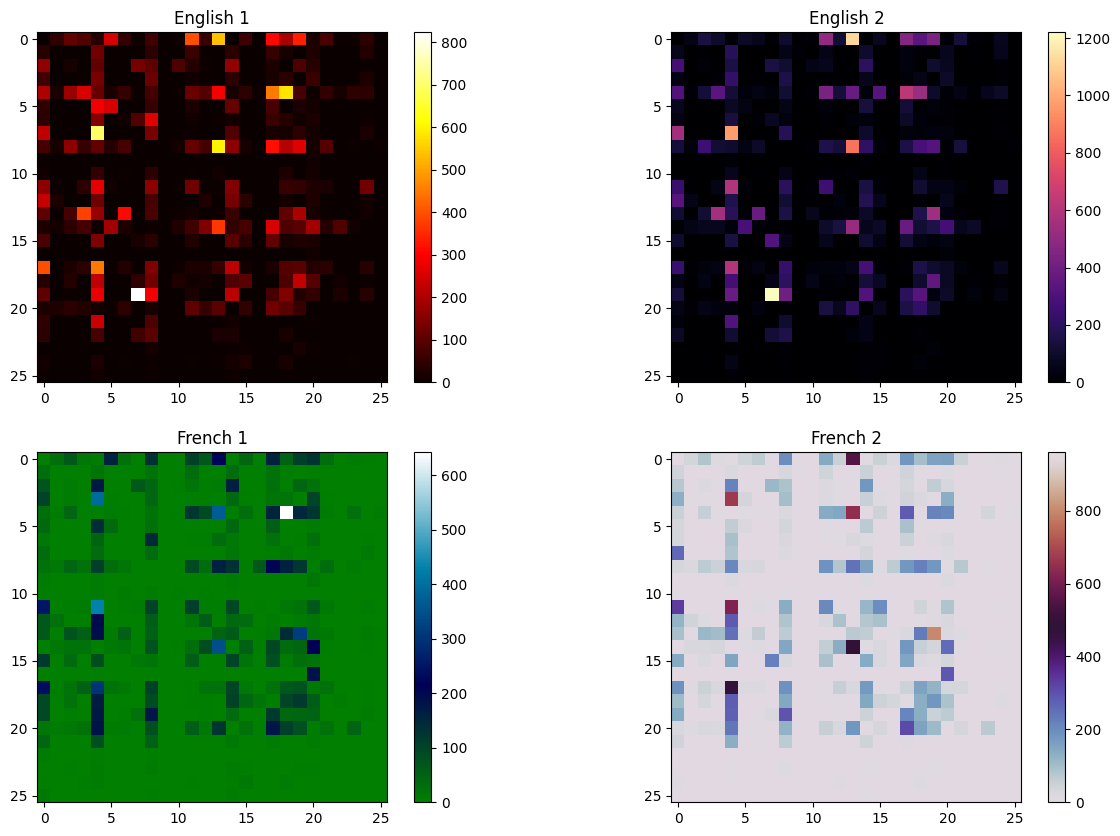

In [16]:
# in order to represent the 2D frequency matrix for both the languages
# Converts frequency of bigrams to 2D freq matrix

# 4 figures created - fig and subplots axs
# grid of 2 rows, 2 cols
# figure size is set by using figsize() in inches
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# create a 2D frequency matrix

# bigram is already declared in prev example
# bigram_eng1 is sent as a parameter for the 2D freq matirx function
bigram_eng1_freq = get_2D_ngram_freq(bigram_eng1)

# visulaises 2D bigram freq matirx as a heatmap and adds a colorbar to the plot
# color is set for the 2D freqency matrix
# cmap specifies the color of the map
fig.colorbar(axs[0, 0].imshow(bigram_eng1_freq, cmap="hot"), ax=axs[0, 0])
axs[0, 0].set_title("English 1")

bigram_eng2_freq = get_2D_ngram_freq(bigram_eng2)
fig.colorbar(axs[0, 1].imshow(bigram_eng2_freq, cmap="magma"), ax=axs[0, 1])
axs[0, 1].set_title("English 2")

bigram_fr1_freq = get_2D_ngram_freq(bigram_fr1)
fig.colorbar(axs[1, 0].imshow(bigram_fr1_freq, cmap="ocean"), ax=axs[1, 0])
axs[1, 0].set_title("French 1")

bigram_fr2_freq = get_2D_ngram_freq(bigram_fr2)
fig.colorbar(axs[1, 1].imshow(bigram_fr2_freq, cmap="twilight"), ax=axs[1, 1])
axs[1, 1].set_title("French 2")
plt.show()

Let us look at the top 10 ngrams for each text.

In [17]:
# coverts a single index(used in a flattened array) into a pair of characters
# that corresponds to the bigram represented by that index.
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / 26) # gives the row index i
    j = int(ind % 26) # gives the col index j
    # finds the ASCII value and then converts to character of i,j
    return (chr(ord("a") + i), chr(ord("a") + j))

# displays the top 'n' most frequent bigrams and their frequencies form a 2D freq matirx
# bifreq - numpy array representing the bigram freq matirx
# n represent top bigrams to display
def ShowTopN(bifreq, n=10):
    f = bifreq.flatten() # converts 26*26 array into 1D array of size 676
    # each element in f corresponds to bigram's frequency
    # sort the 1D array 'f' in descending order
    # argsort by default sorts in asc , so if -ve it desc
    arg = np.argsort(-f) # returns indeices sort array f in desc (highest freq first)

    for ii in range(n):
        # prints bigram and its frequency
        # arg[ii] gives most frequent bigram
        # ind2tup(arg[ii]) converts index back to tuple representing actual bigram
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")

In [18]:
print("\nEnglish 1:")
ShowTopN(bigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(bigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(bigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(bigram_fr2_freq)


English 1:
('t', 'h') : 823.0
('h', 'e') : 697.0
('i', 'n') : 601.0
('e', 's') : 579.0
('a', 'n') : 539.0
('e', 'r') : 451.0
('r', 'e') : 449.0
('r', 'a') : 396.0
('a', 'l') : 396.0
('n', 'd') : 380.0

English 2:
('t', 'h') : 1220.0
('a', 'n') : 1122.0
('h', 'e') : 970.0
('i', 'n') : 867.0
('e', 'r') : 628.0
('r', 'e') : 599.0
('l', 'e') : 597.0
('n', 'd') : 561.0
('h', 'a') : 552.0
('n', 't') : 540.0

French 1:
('e', 's') : 642.0
('l', 'e') : 431.0
('d', 'e') : 392.0
('e', 'n') : 370.0
('o', 'n') : 348.0
('n', 't') : 318.0
('r', 'e') : 301.0
('l', 'a') : 250.0
('r', 'a') : 237.0
('a', 'n') : 223.0

French 2:
('e', 's') : 960.0
('n', 't') : 801.0
('d', 'e') : 671.0
('e', 'n') : 646.0
('l', 'e') : 620.0
('a', 'n') : 554.0
('o', 'n') : 494.0
('r', 'e') : 469.0
('l', 'a') : 333.0
('u', 'r') : 311.0


* We observe that the bigrams are similar across different topics but different across languages.
* Thus, the **bigram frequency** is a good feature for **distinguishing languages, but not for distinguishing topics**.

* Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

> # **EXERCISE**:
**Try to extract trigrams and visualize the top 10 trigrams for each text.**

# **TRIGRAMS**
* A trigram is a sequence of three consecutive elements (such as letters, words, or symbols) in a given text or dataset.
* Trigrams are often used in natural language processing (NLP) and text analysis to study patterns and relationships between sequences of three items.
#### For Example:
1. word - "chat"
  letter trigrams - "cha", "hat"

2. sentence - "The cat is"
   letter trigrams - "The","he ","e c"," ca","cat","at ","t i"," is"

3. sentence - "The cat is cute"
   word trigrams - The cat is", "cat is cute"

#### **Usage of Trigrams:**
* **Text Prediction:** Trigrams are used in text prediction models. For example, given the words "The cat," a model using trigrams might predict the next word as "is" based on the frequency of the trigram "The cat is" in the training data.

* **Text Analysis:** Trigrams can help identify common phrases or patterns in large text corpora, which is useful for tasks like keyword extraction, topic modeling, or sentiment analysis.

* **Speech Recognition:** In speech recognition systems, trigrams are used to improve the accuracy of word predictions by considering the context of the previous two words.

<ipython-input-19-cff296d9e740>:50: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()  # Adjust subplot parameters to fit into figure area


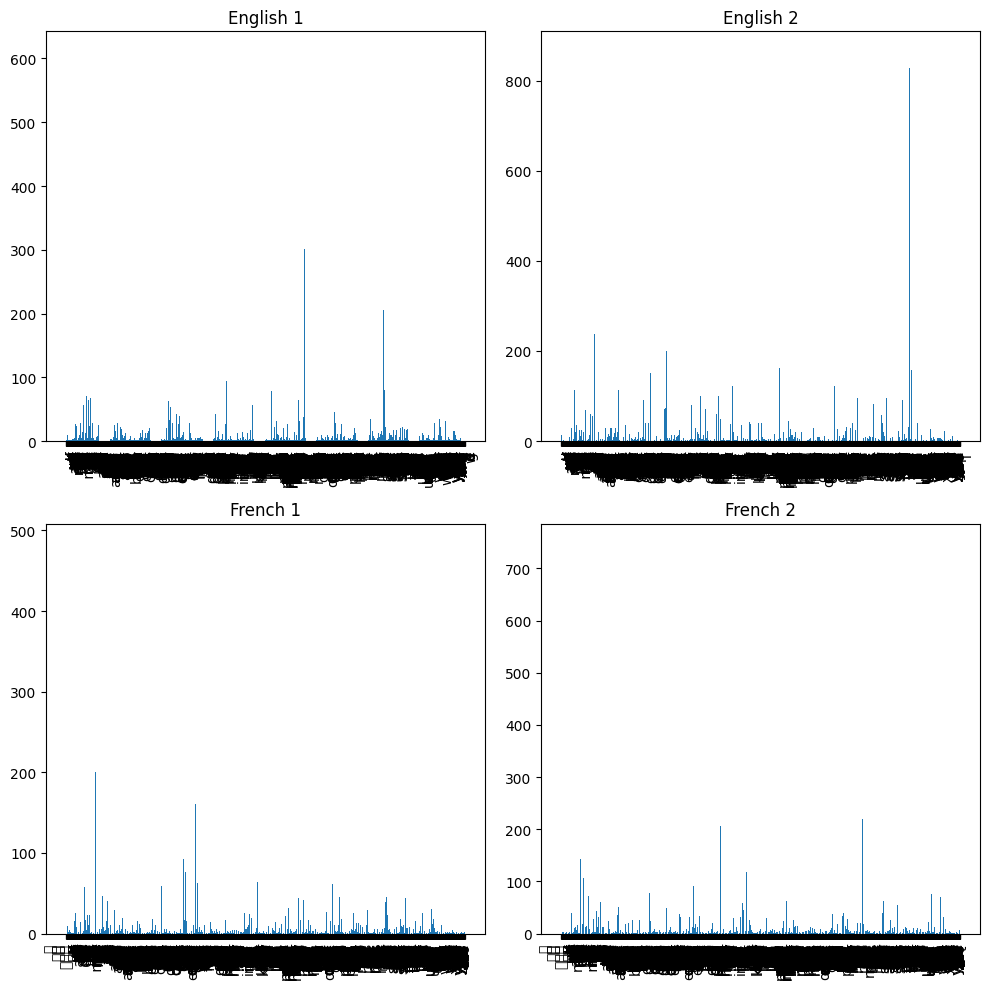

In [19]:
# Create a grid of 2 rows, 2 columns for subplots
# Set the figure size for the plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Calculate trigrams (n-grams of size 3) for the first English text
trigram_eng1 = Counter(ngrams(eng1, 3))

# Extract keys and values (trigrams and their frequencies)
keys, values = get_ngram_freq(trigram_eng1)

# Plot the bar chart for the first English text in the first subplot
axs[0, 0].bar([''.join(t) for t in keys], values)  # Join tuple elements into strings for better readability
axs[0, 0].set_title("English 1")
axs[0, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Calculate trigrams (n-grams of size 3) for the second English text
trigram_eng2 = Counter(ngrams(eng2, 3))

# Extract keys and values (trigrams and their frequencies)
keys, values = get_ngram_freq(trigram_eng2)

# Plot the bar chart for the second English text in the second subplot
axs[0, 1].bar([''.join(t) for t in keys], values)  # Join tuple elements into strings
axs[0, 1].set_title("English 2")
axs[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Calculate trigrams (n-grams of size 3) for the first French text
trigram_fr1 = Counter(ngrams(fr1, 3))

# Extract keys and values (trigrams and their frequencies)
keys, values = get_ngram_freq(trigram_fr1)

# Plot the bar chart for the first French text in the third subplot
axs[1, 0].bar([''.join(t) for t in keys], values)  # Join tuple elements into strings
axs[1, 0].set_title("French 1")
axs[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Calculate trigrams (n-grams of size 3) for the second French text
trigram_fr2 = Counter(ngrams(fr2, 3))

# Extract keys and values (trigrams and their frequencies)
keys, values = get_ngram_freq(trigram_fr2)

# Plot the bar chart for the second French text in the fourth subplot
axs[1, 1].bar([''.join(t) for t in keys], values)  # Join tuple elements into strings
axs[1, 1].set_title("French 2")
axs[1, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Display the plots
plt.tight_layout()  # Adjust subplot parameters to fit into figure area
plt.show()

In [20]:
def get_3D_ngram_freq(ngram):
    # Initialize a 3D matrix of size 26x26x26 filled with zeros
    freq = np.zeros((26, 26, 26))

    # Iterate over all possible combinations of indices
    for i in range(26):  # First character in the trigram
        for j in range(26):  # Second character in the trigram
            for k in range(26):  # Third character in the trigram
                # Construct the trigram tuple
                trigram = (chr(ord("a") + i), chr(ord("a") + j), chr(ord("a") + k))
                # Assign the frequency to the corresponding cell in the 3D matrix
                freq[i, j, k] = ngram.get(trigram, 0)

    return freq


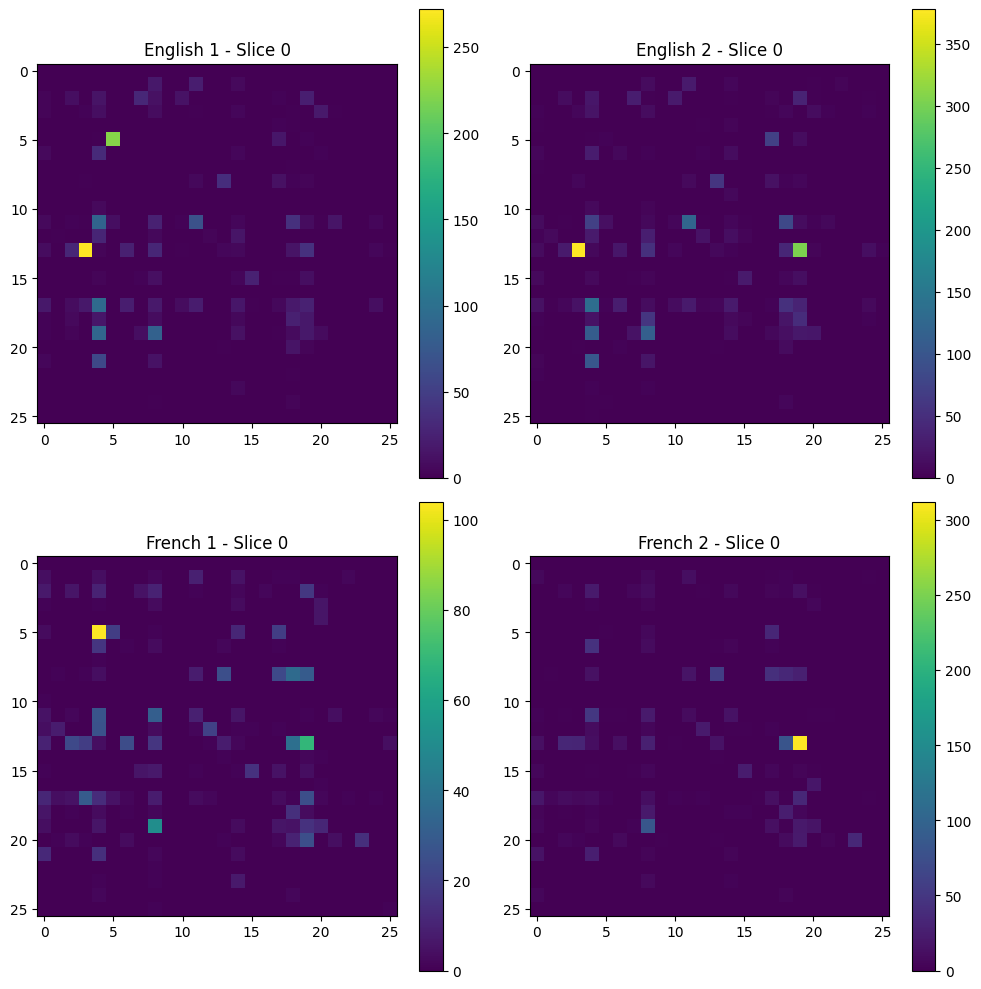

In [21]:

def plot_2D_trigram_slices(trigram_freq, title, ax):
    """
    Visualize slices of a 3D trigram frequency matrix as 2D heatmaps.
    Args:
        trigram_freq (np.ndarray): 3D frequency matrix of trigrams.
        title (str): Title for the subplot.
        ax (matplotlib.axes._axes.Axes): Axes to plot on.
    """
    # Choose one slice for visualization; here, we use the first slice for demonstration
    slice_index = 0
    slice_freq = trigram_freq[slice_index, :, :]

    # Plot the heatmap
    cax = ax.imshow(slice_freq, cmap="viridis")
    ax.set_title(f"{title} - Slice {slice_index}")
    fig.colorbar(cax, ax=ax, orientation='vertical')

# Create a grid of 2 rows, 2 columns for subplots
# Set the figure size for the plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Generate 2D frequency matrices for trigrams
# Assuming trigram frequency matrices are already computed
trigram_eng1_freq = get_3D_ngram_freq(trigram_eng1)
trigram_eng2_freq = get_3D_ngram_freq(trigram_eng2)
trigram_fr1_freq = get_3D_ngram_freq(trigram_fr1)
trigram_fr2_freq = get_3D_ngram_freq(trigram_fr2)

# Plot the 2D slices of the trigram frequency matrices
plot_2D_trigram_slices(trigram_eng1_freq, "English 1", axs[0, 0])
plot_2D_trigram_slices(trigram_eng2_freq, "English 2", axs[0, 1])
plot_2D_trigram_slices(trigram_fr1_freq, "French 1", axs[1, 0])
plot_2D_trigram_slices(trigram_fr2_freq, "French 2", axs[1, 1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [22]:
def ind2tup(ind):
    ind = int(ind)
    i = int(ind / (26 * 26))  # First character index
    j = int((ind % (26 * 26)) / 26)  # Second character index
    k = int(ind % 26)  # Third character index
    # Convert indices to characters
    return (chr(ord("a") + i), chr(ord("a") + j), chr(ord("a") + k))

def ShowTopN(trifreq, n=10):
    # Flatten the 3D matrix into a 1D array
    f = trifreq.flatten()  # Converts 26*26*26 array into 1D array

    # Get indices of sorted elements in descending order
    arg = np.argsort(-f)  # Sort indices based on frequency in descending order

    for ii in range(n):
        # Print the trigram and its frequency
        print(f"{ind2tup(arg[ii])} : {f[arg[ii]]}")



In [23]:
# Usage examples:
print("\nEnglish 1:")
ShowTopN(trigram_eng1_freq)

print("\nEnglish 2:")
ShowTopN(trigram_eng2_freq)

print("\nFrench 1:")
ShowTopN(trigram_fr1_freq)

print("\nFrench 2:")
ShowTopN(trigram_fr2_freq)



English 1:
('t', 'h', 'e') : 589.0
('a', 'n', 'd') : 272.0
('i', 'r', 'a') : 229.0
('r', 'a', 'f') : 227.0
('g', 'i', 'r') : 225.0
('a', 'f', 'f') : 223.0
('f', 'f', 'e') : 205.0
('i', 'n', 'g') : 202.0
('i', 'o', 'n') : 140.0
('m', 'a', 'l') : 123.0

English 2:
('t', 'h', 'e') : 828.0
('a', 'n', 'd') : 378.0
('h', 'a', 'n') : 318.0
('a', 'n', 't') : 304.0
('i', 'n', 'g') : 295.0
('e', 'l', 'e') : 293.0
('p', 'h', 'a') : 292.0
('e', 'p', 'h') : 285.0
('l', 'e', 'p') : 285.0
('n', 't', 's') : 205.0

French 1:
('l', 'e', 's') : 172.0
('e', 'n', 't') : 161.0
('r', 'a', 'f') : 134.0
('i', 'r', 'a') : 133.0
('g', 'i', 'r') : 130.0
('q', 'u', 'e') : 128.0
('i', 'o', 'n') : 108.0
('a', 'f', 'e') : 104.0
('d', 'e', 's') : 100.0
('l', 'l', 'e') : 95.0

French 2:
('e', 'n', 't') : 326.0
('a', 'n', 't') : 312.0
('l', 'e', 's') : 251.0
('p', 'h', 'a') : 212.0
('h', 'a', 'n') : 206.0
('l', 'p', 'h') : 195.0
('q', 'u', 'e') : 175.0
('d', 'e', 's') : 157.0
('i', 'o', 'n') : 139.0
('o', 'n', 't') : 1

* **Trigram Similarity Across Topics:** Trigrams capture specific patterns and are more effective at distinguishing between topics within the same language than bigrams, revealing unique topic-specific sequences.

* **Trigram Differences Across Languages:** Trigrams vary significantly between languages due to distinct linguistic patterns, making them excellent for language identification.

* **Dimensionality:** Trigrams expand the feature space to 26^3 dimensions, offering a detailed representation of text but increasing complexity.

* **Feature Utility:** Trigram frequencies provide rich features for text analysis, capturing nuanced patterns and relationships that are useful for both topic modeling and language classification.

# **Part 2: WRITTEN NUMBERS**

We've seen how to extract features from text. Now let us see how to extract features from images. We will use the MNIST dataset which contains images of handwritten numbers. Each image is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

**Keras** - is a high level neural networks API, written in Python capable of running on top of several lower-level machine learning frameworks.

In [24]:
from keras.datasets import mnist

# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [25]:
no1 = train_X[train_y == 1, :, :]
no0 = train_X[train_y == 0, :, :]

Let us visualize a few images here:

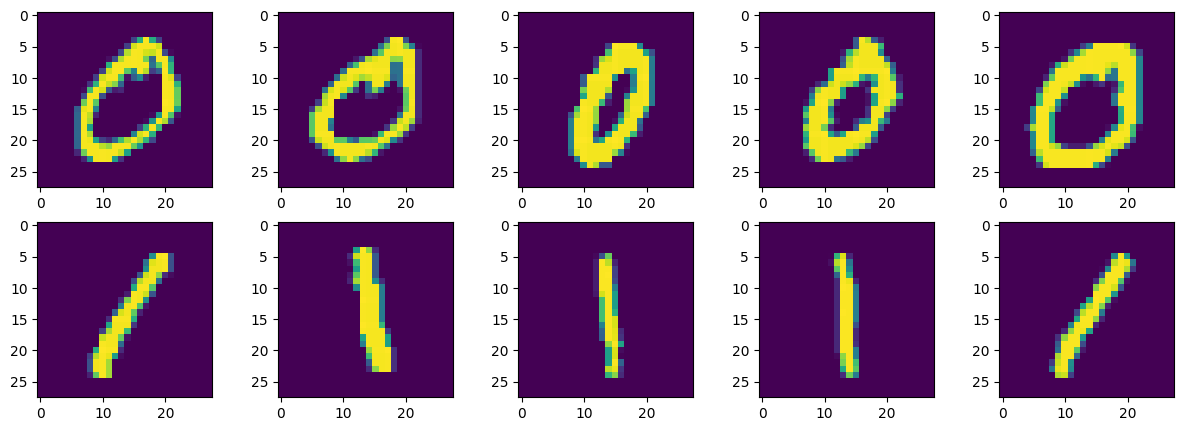

In [26]:
fig, axs = plt.subplots(2, 5, figsize=(15, 5))

for ii in range(5):
    axs[0, ii].imshow(no0[ii, :, :])

for ii in range(5):
    axs[1, ii].imshow(no1[ii, :, :])
plt.show()

Now, let us start with a simple feature: the sum of all pixels. Let's see how good this feature is.

In [27]:
sum1 = np.sum(no1 > 0, (1, 2))  # threshold before adding up
sum0 = np.sum(no0 > 0, (1, 2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

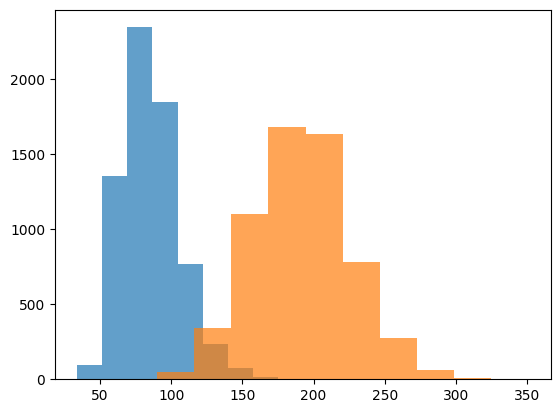

In [28]:
plt.hist(sum1, alpha=0.7)
plt.hist(sum0, alpha=0.7)
plt.show()

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [29]:
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = (
            img2[ii, :] + img2[ii - 1, :]
        )  # for every row, add up all the rows above it.
    img2 = img2 > 0
    return img2


def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    # remove the original digit to leave behind the holes
    hole = hull & ~(img > 0)
    return hole

Visualize a few. First row has the original zero number images and the second row has the hole pixels. Thrid row has original one number images and the last row has corresponding hole pixels which are non-existent, as expected.

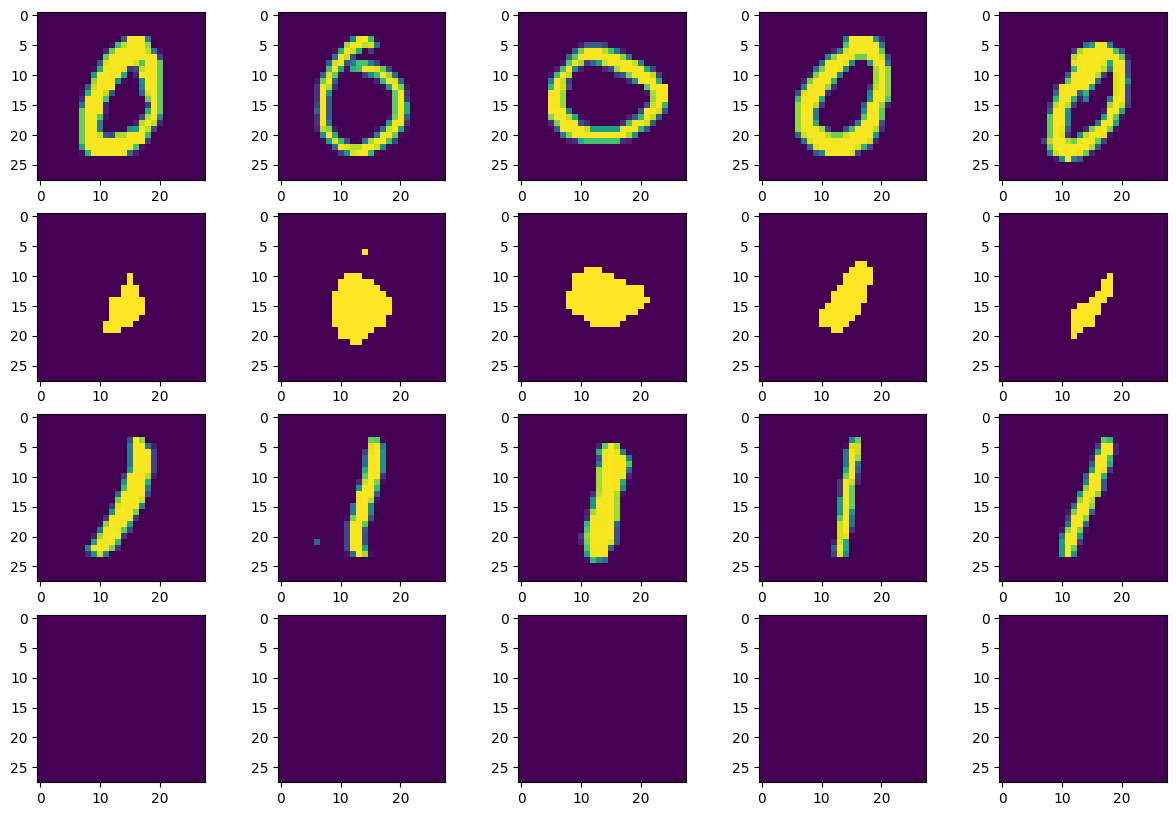

In [30]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHolePixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHolePixels(no1[idx, :, :]))

Now let us plot the number of hole pixels and see how this feature behaves

(array([ 163.,  663., 1199., 1355., 1138.,  834.,  401.,  127.,   36.,
           7.]),
 array([  0. ,  18.9,  37.8,  56.7,  75.6,  94.5, 113.4, 132.3, 151.2,
        170.1, 189. ]),
 <BarContainer object of 10 artists>)

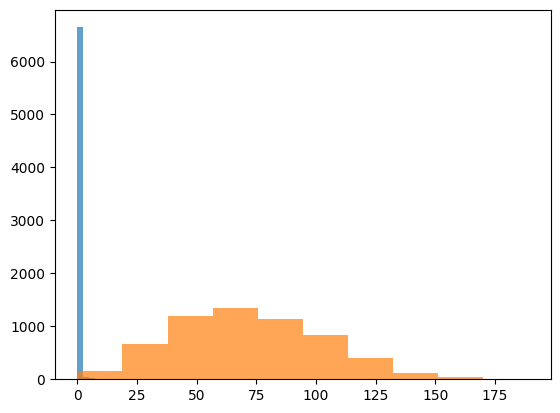

In [31]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7)
plt.hist(hole0, alpha=0.7)

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [32]:
def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(
        cumArray(np.rot90(img)), 3
    )  # rotate and cumulate it again for differnt direction
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = (
        im1 & im2 & im3 & im4
    )  # this will create a binary image with all the holes filled in.
    return hull

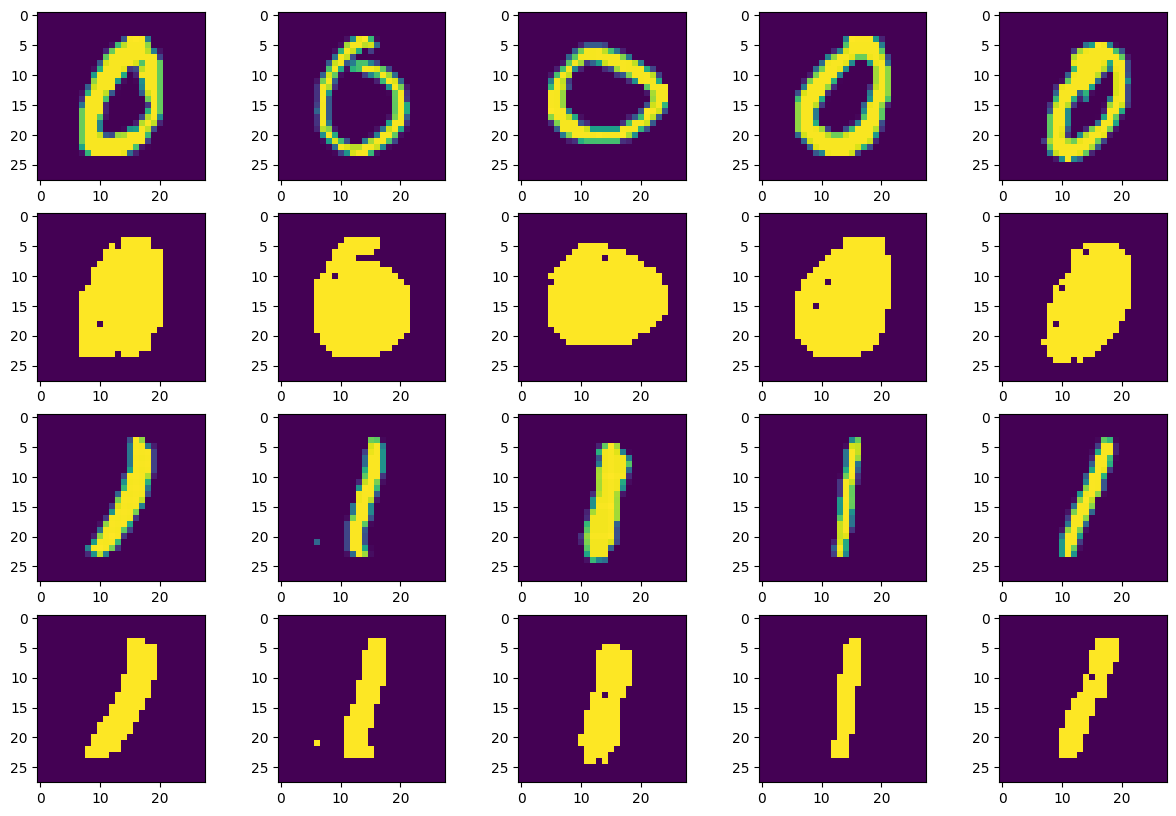

In [33]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getHullPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getHullPixels(no1[idx, :, :]))

Plotting the number of hull pixels versus the digit:

(array([  10.,   64.,  245.,  611., 1042., 1379., 1395.,  917.,  251.,
           9.]),
 array([113. , 139.3, 165.6, 191.9, 218.2, 244.5, 270.8, 297.1, 323.4,
        349.7, 376. ]),
 <BarContainer object of 10 artists>)

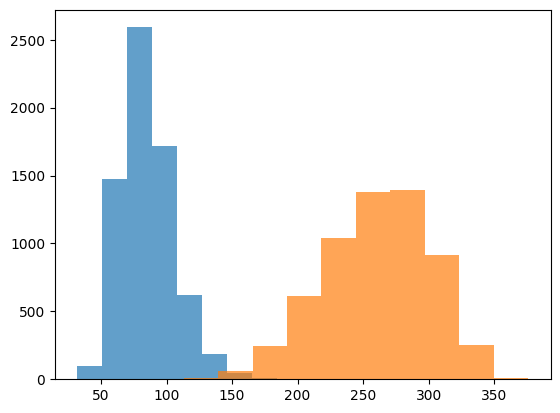

In [34]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7)
plt.hist(hull0, alpha=0.7)

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [35]:
def minus(a, b):
    return a & ~b


def getBoundaryPixels(img):
    img = img.copy() > 0  # binarize the image
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

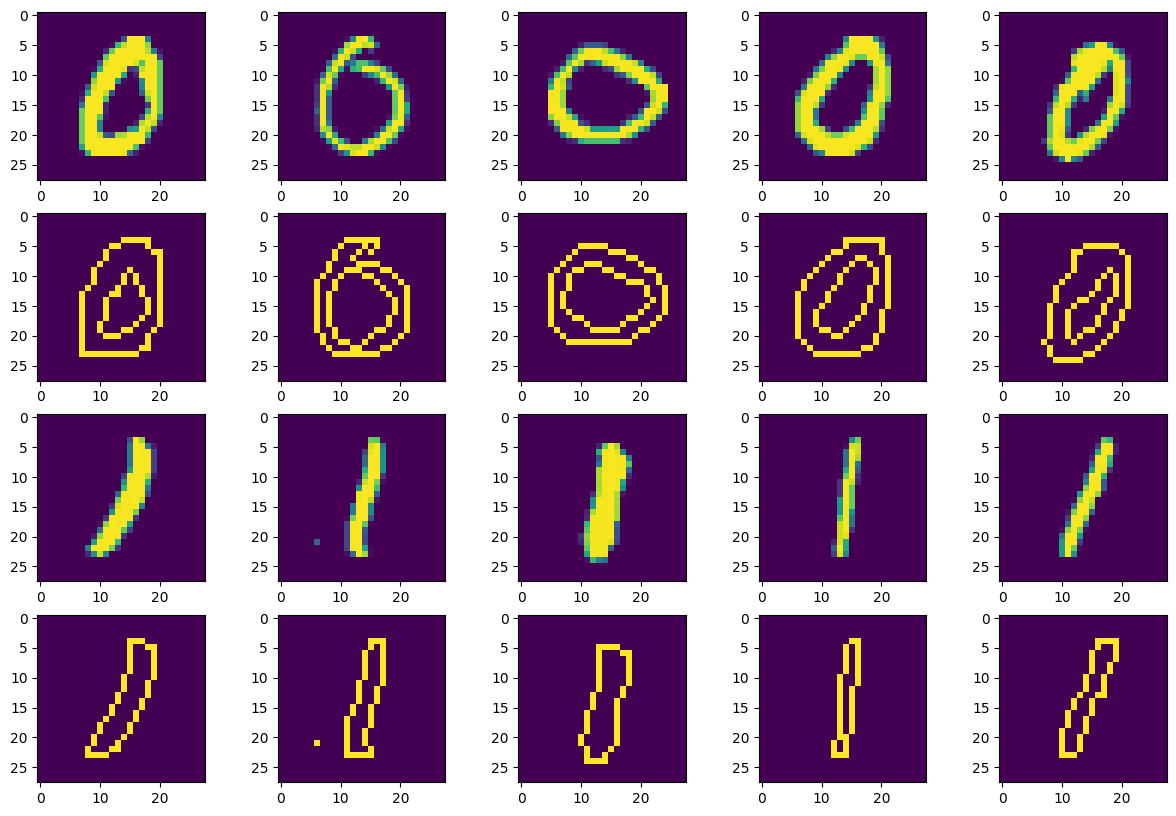

In [36]:
img_ids = [12, 236, 345, 435, 512]
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for ii, idx in enumerate(img_ids):
    axs[0, ii].imshow(no0[idx, :, :])
    axs[1, ii].imshow(getBoundaryPixels(no0[idx, :, :]))
    axs[2, ii].imshow(no1[idx, :, :])
    axs[3, ii].imshow(getBoundaryPixels(no1[idx, :, :]))

(array([  14.,   21.,   99.,  450., 1300., 2262., 1339.,  375.,   52.,
          11.]),
 array([ 48. ,  55.2,  62.4,  69.6,  76.8,  84. ,  91.2,  98.4, 105.6,
        112.8, 120. ]),
 <BarContainer object of 10 artists>)

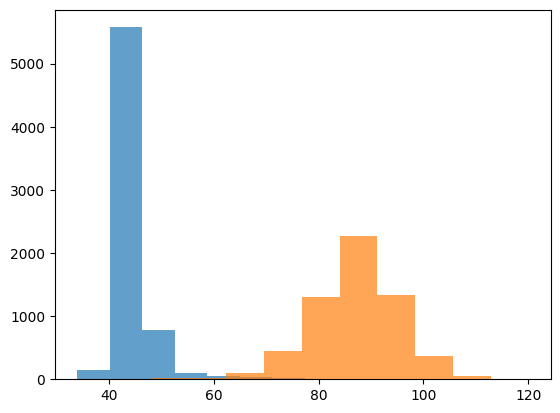

In [37]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0 = np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7)
plt.hist(bound0, alpha=0.7)

What will happen if we plot two features together?

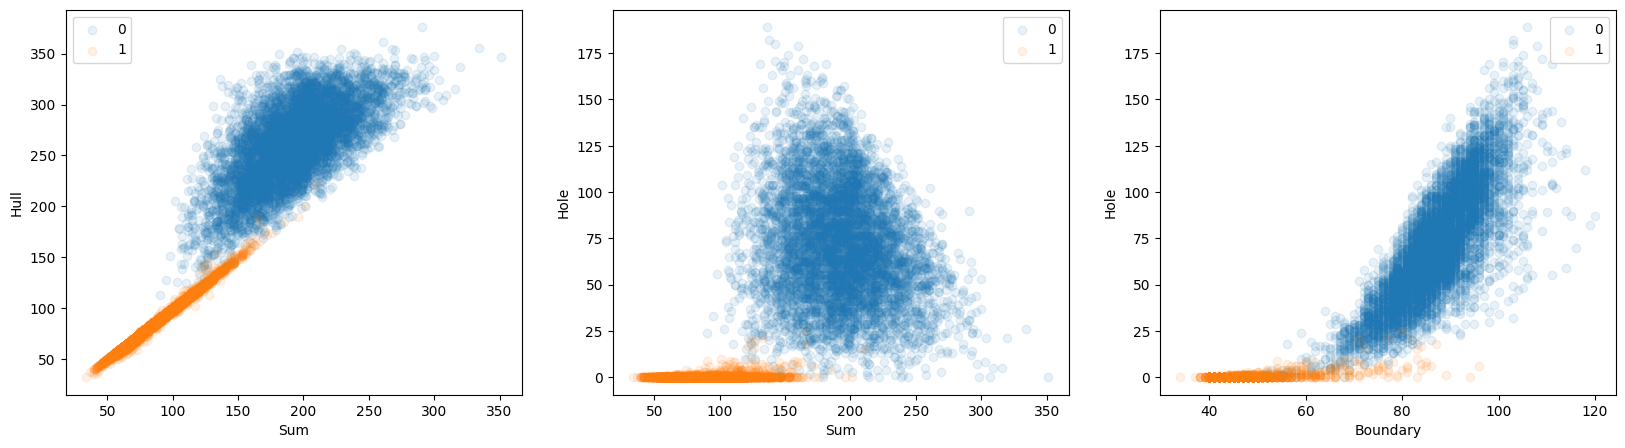

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(sum0, hull0, alpha=0.1)
axs[0].scatter(sum1, hull1, alpha=0.1)
axs[0].set_xlabel("Sum")
axs[0].set_ylabel("Hull")
axs[0].legend(["0", "1"])

axs[1].scatter(sum0, hole0, alpha=0.1)
axs[1].scatter(sum1, hole1, alpha=0.1)
axs[1].set_xlabel("Sum")
axs[1].set_ylabel("Hole")
axs[1].legend(["0", "1"])

axs[2].scatter(bound0, hole0, alpha=0.1)
axs[2].scatter(bound1, hole1, alpha=0.1)
axs[2].set_xlabel("Boundary")
axs[2].set_ylabel("Hole")
axs[2].legend(["0", "1"])
plt.show()

Now let us try plotting 3 features together.

In [39]:
cl1 = ["class 1"] * len(sum1)
cl0 = ["class 0"] * len(sum0)
df = pd.DataFrame(
    list(
        zip(
            np.concatenate((hole0, hole0)),
            np.concatenate((sum1, sum0)),
            np.concatenate((bound1, bound0)),
            np.concatenate((cl1, cl0)),
        )
    ),
    columns=["Hole", "Sum", "Boundary", "Class"],
)
df.head()
fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary",
                    color="Class", opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

> Exercise: Remember we took a subset of only the first two numbers in MNIST? Include 5 or more numbers now and try to visualise which feature works best when multiple numbers are involved. Brownie points if you use all numbers :)

In [40]:
# Load the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Filter for multiple digits
digits_to_include = [2, 3, 4, 5, 6]
filtered_X = train_X[np.isin(train_y, digits_to_include)]
filtered_y = train_y[np.isin(train_y, digits_to_include)]

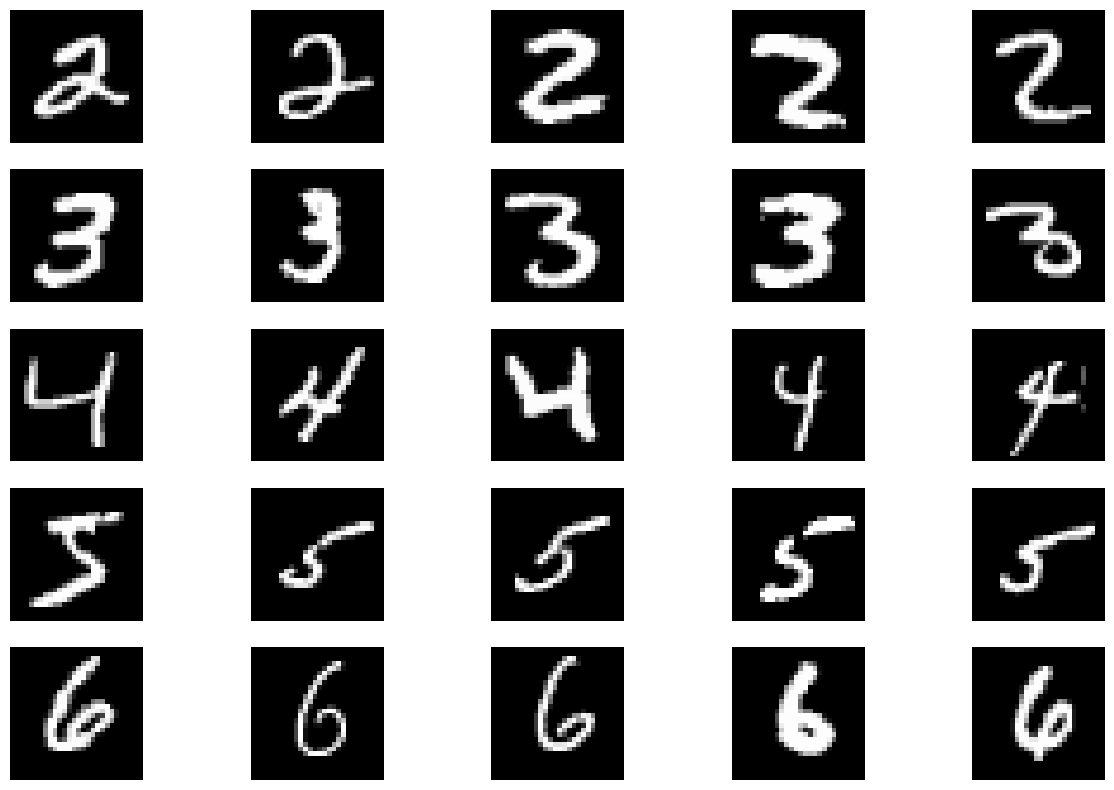

In [42]:
# visualize the selected digits
fig, axs = plt.subplots(len(digits_to_include), 5, figsize=(15, 10))

for i, digit in enumerate(digits_to_include):
    digit_images = filtered_X[filtered_y == digit]
    for j in range(5):
        axs[i, j].imshow(digit_images[j, :, :], cmap='gray')
        axs[i, j].axis('off')
    axs[i, 0].set_ylabel(f'Digit {digit}', rotation=0, labelpad=30)
plt.show()

In [43]:
# computer features - like sum, hole, hull, boundary
def cumArray(img):
    img2 = img.copy()
    for ii in range(1, img2.shape[1]):
        img2[ii, :] = img2[ii, :] + img2[ii - 1, :]
    img2 = img2 > 0
    return img2

def getHolePixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    hole = hull & ~(img > 0)
    return hole

def getHullPixels(img):
    im1 = cumArray(img)
    im2 = np.rot90(cumArray(np.rot90(img)), 3)
    im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
    im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
    hull = im1 & im2 & im3 & im4
    return hull

def getBoundaryPixels(img):
    img = img.copy() > 0
    rshift = np.roll(img, 1, 1)
    lshift = np.roll(img, -1, 1)
    ushift = np.roll(img, -1, 0)
    dshift = np.roll(img, 1, 0)
    boundary = (
        minus(img, rshift)
        | minus(img, lshift)
        | minus(img, ushift)
        | minus(img, dshift)
    )
    return boundary

# Calculate features for each digit
hull_vals = np.array([getHullPixels(i).sum() for i in filtered_X])
hole_vals = np.array([getHolePixels(i).sum() for i in filtered_X])
boundary_vals = np.array([getBoundaryPixels(i).sum() for i in filtered_X])
sum_vals = np.array([np.sum(i > 0) for i in filtered_X])

In [46]:
hull_vals

array([164, 120, 193, ..., 165, 145, 175])

In [47]:
hole_vals

array([ 1,  0, 10, ..., 17, 10, 32])

In [48]:
boundary_vals

array([80, 83, 83, ..., 83, 80, 93])

In [49]:
sum_vals

array([166, 120, 188, ..., 151, 136, 145])

In [45]:
# use 3D scatter plots to visualize the distribution of these features for different digits

cl = [f'class {digit}' for digit in filtered_y]
df = pd.DataFrame(
    list(zip(hole_vals, sum_vals, boundary_vals, cl)),
    columns=["Hole", "Sum", "Boundary", "Class"],
)

fig = px.scatter_3d(df, x="Hole", y="Sum", z="Boundary", color="Class", opacity=0.5)
fig.show()
